## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [63]:
df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [64]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


In [65]:
df.tail()

,DATE,TAG,POSTS
2575,2024-01-01 00:00:00,php,1729
2576,2024-01-01 00:00:00,python,8926
2577,2024-01-01 00:00:00,r,1916
2578,2024-01-01 00:00:00,ruby,170
2579,2024-01-01 00:00:00,swift,990


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [66]:
df.shape

(2580, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [67]:
df.count()

DATE     2580
TAG      2580
POSTS    2580
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [68]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,43965
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,402584
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1610908
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,804282
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51662
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,72236
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1913552
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2522796
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68035


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [69]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,186,186
c,186,186
c#,187,187
c++,186,186
delphi,186,186
go,171,171
java,186,186
javascript,186,186
perl,186,186


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [70]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [71]:
df.DATE[1]

'2008-08-01 00:00:00'

In [72]:
type(df['DATE'][1])

str

In [73]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [74]:
reshaped_df = df.pivot(index='DATE',columns='TAG',values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,157.0,872.0,3052.0,1491.0,105.0,424.0,3330.0,5700.0,61.0,1665.0,8623.0,2038.0,191.0,861.0
2023-10-01,175.0,975.0,3199.0,1723.0,165.0,423.0,3445.0,5500.0,53.0,1547.0,9056.0,2067.0,196.0,905.0
2023-11-01,173.0,961.0,3120.0,1472.0,104.0,411.0,3301.0,5230.0,44.0,1406.0,8521.0,2000.0,157.0,873.0


In [75]:
reshaped_df.fillna(0, inplace=True) 

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [76]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,157.0,872.0,3052.0,1491.0,105.0,424.0,3330.0,5700.0,61.0,1665.0,8623.0,2038.0,191.0,861.0
2023-10-01,175.0,975.0,3199.0,1723.0,165.0,423.0,3445.0,5500.0,53.0,1547.0,9056.0,2067.0,196.0,905.0
2023-11-01,173.0,961.0,3120.0,1472.0,104.0,411.0,3301.0,5230.0,44.0,1406.0,8521.0,2000.0,157.0,873.0


In [77]:
reshaped_df.isna().values.any()

False

In [78]:
reshaped_df.count()

TAG
assembly      187
c             187
c#            187
c++           187
delphi        187
go            187
java          187
javascript    187
perl          187
php           187
python        187
r             187
ruby          187
swift         187
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [79]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

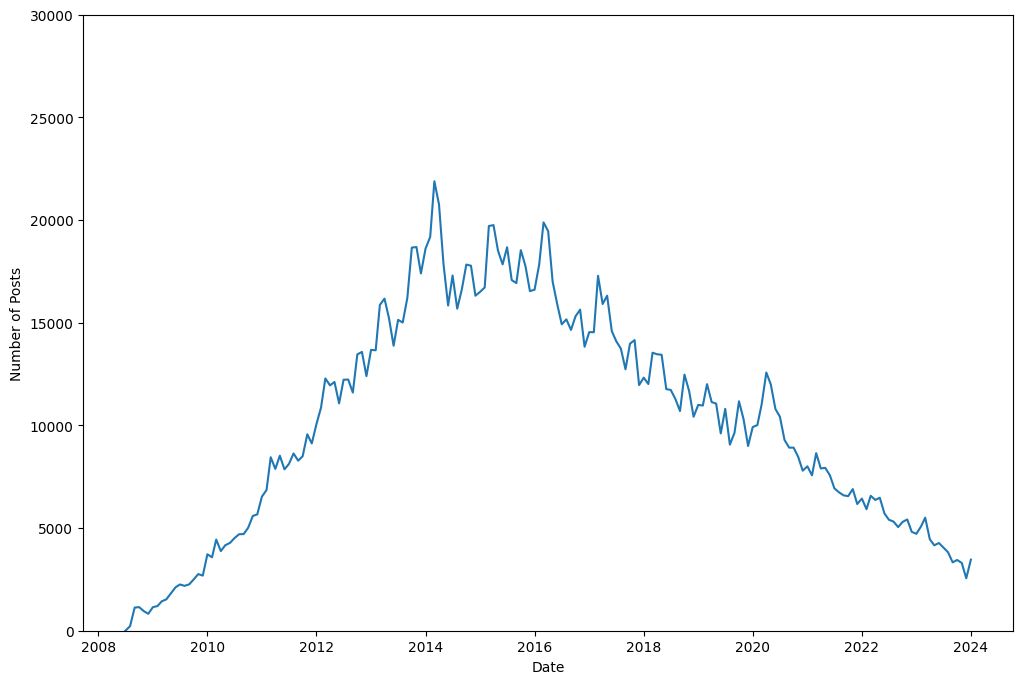

In [80]:
plt.figure(figsize=(12,8)) 
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.ylim(0,30000)
plt.plot(reshaped_df.index,reshaped_df.java)
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

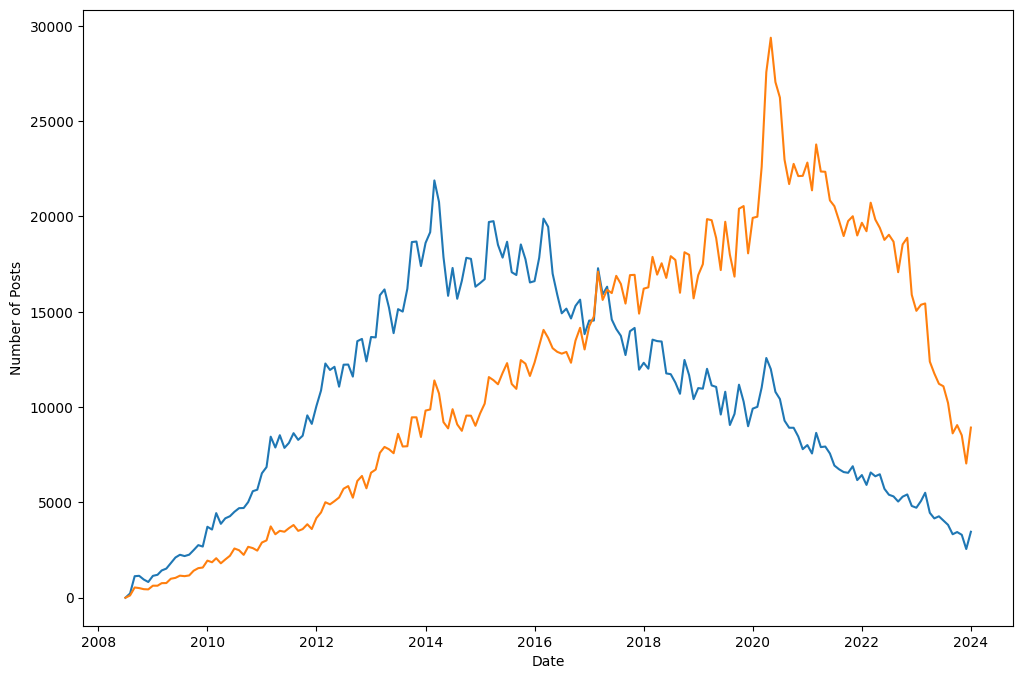

In [81]:
plt.figure(figsize=(12,8))
plt.xlabel("Date")
plt.ylabel('Number of Posts')
plt.plot(reshaped_df.index,reshaped_df['java'],reshaped_df['python'])
plt.show()

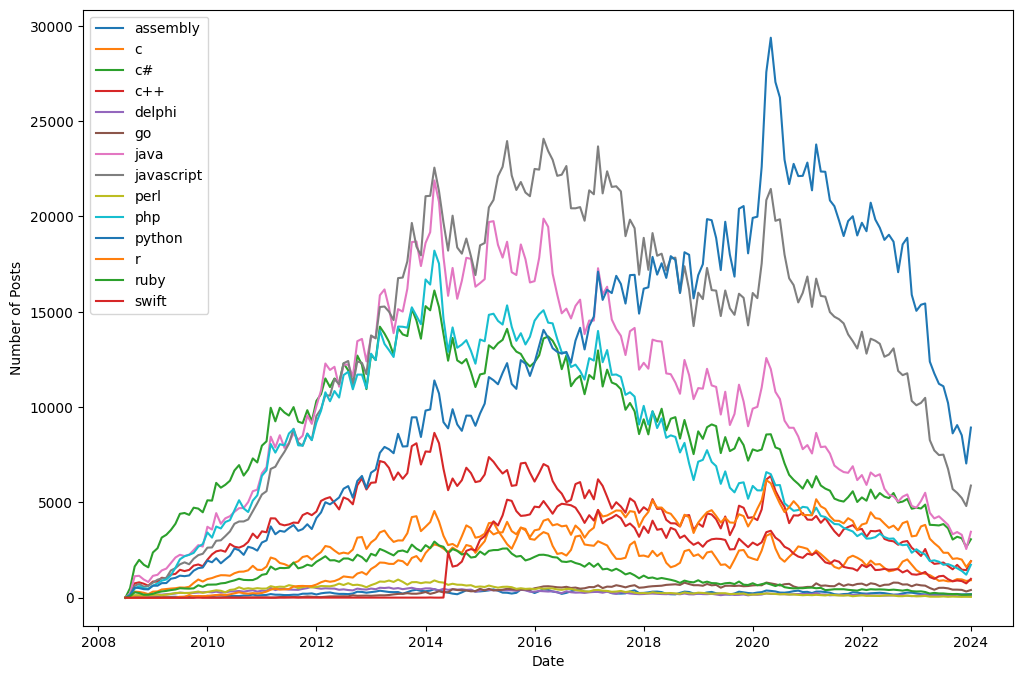

In [82]:
# Print ALl the Programming Languages on the same Chart
plt.figure(figsize=(12,8))
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])
plt.legend(reshaped_df.columns)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

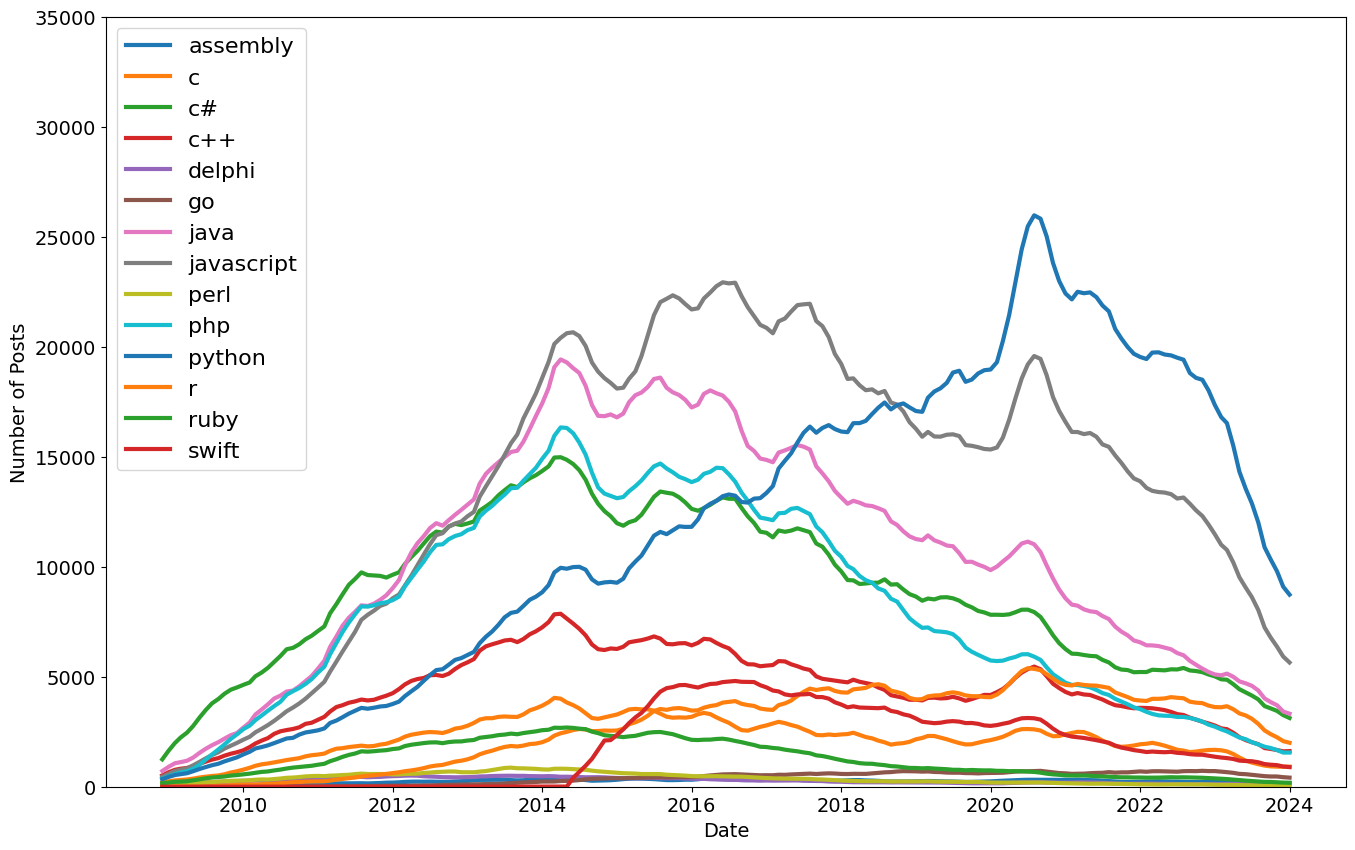

In [83]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)